# Introduction to Matplotlib

One of the most important skills when working with Python, especially in a scientific setting, is learning how to plot data. While the process for getting to these plots may be difficult to start, with enough practice (and with referencing the plotting documentation), you should be able to feel comfortable plotting data in no time. In this introduction, we'll go through the basic workflow and syntax needed to create plots using the most common Python plotting library, `matplotlib`.

In [1]:
## Imports for data generation ##
import numpy as np
from math import *

## `Matplotlib`: Python's Standard Plotting Library

The most common method for plotting data in Python is to use a library called `matplotlib`. Matplotlib contains a library of various plotting functions and even makes up the foundation for more complex plotting libraries, such as `Seaborn`. Getting started with matplotlib can be confusing at first, as there are many different ways to get to a plot, depending on the level of complexity you want. To help get you started, we'll start with the basic approach and build upon the foundations to more complex plotting techniques.

## Basic `matplotlib` Setup

In [2]:
import matplotlib.pyplot as plt

Above is the conventional method for importing `matplotlib`. Because most of the functions we will be working with come from the `matplotlib.pyplot` module, this makes it easier to write out those functions (programmers love saving keystrokes and minimizing redundant characters).

### Matplotlib Figures and Plots/Axis

You will work with two main objects when plotting with matplotlib: **Figures** and **Axes**. The distinction between these two objects is a little blurry, and that causes most of the confusion when starting with matplotlib. Let's break this distinction down and see how they work in the examples below.

#### Figures

The top-level object in matplotlib is the "figure." These figures are blank canvases that can contain one or more different plot/axis objects (see below). At any moment, matplotlib will only have a single figure "active" and editable.

#### Axes

Just below the "figure" object is the "axis" object. If the figure is the blank canvas, the "axis" is the actual painting or image you are working with. You can have multiple "axis" objects, or plots, on a single figure.

### Plotting Workflow

Plotting with `matplotlib` follows a basic flow of commands:

1. Initialize Figure
2. Plot your data
3. Add plot details
4. Save your figure (optional)

The confusion with the plotting workflow is that there are different levels of complexity when approaching each step. To help clear up this confusion, we'll walk through multiple examples, slowly building up to more complex graphs.

---

## Example 1: Single Line Plot

For the first example, let's try plotting a sin wave. We'll provide the code for the plot, and then break it down below.

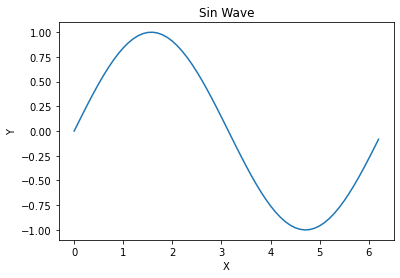

In [3]:
### Data Generation
x = np.arange(0, 2*pi, step = .1) # X Values
y = np.sin(x) # Y Values

### Plotting ###
plt.figure(1)  # Activate/Create Figure "1" and store as figure 1
plt.plot(x,y)  # Add a line plot correpsonding to data x,y
plt.xlabel('X')  # Add a label to the x-axis
plt.ylabel('Y')  # Add a label to the y-axis
plt.title('Sin Wave');# Add a title to your figure

### Step 1: Initialize Figure

```python
plt.figure(1)
```

As mentioned above, this line creates and activates a new matplotlib figure, labeled `1`. At this point, we now have a canvas, but no plots.

### Step 2: Plot your data

```python
plt.plot(x,y)
```

This line now generates a line plot using the data stored in `x` and `y`. Because we aren't adding multiple plots to our figure, we don't have to explicitly specify and create an "axis" object, but there is still one under the hood.

### Step 3: Add plot details

```python
plt.xlabel('X')  # Add a label to the x-axis
plt.ylabel('Y')  # Add a label to the y-axis
plt.title('Sin Wave');# Add a title to your figure
```

Since we've generated an active figure ('1'), we can now make changes using various functions. Since there is only a single subplot/axis on this figure, modifying the figure itself is enough to generate the proper labels.

---

## Example 2: Multi-line Plots
Above, we saw how to plot a single line on a figure. With `matplotlib`, you can easily add multiple lines to the same plot with minimal changes! Additionally, we'll start to introduce the more generalized plotting workflow using an explicit axis definition. This approach will generalize to more complex graphs presented in later examples.

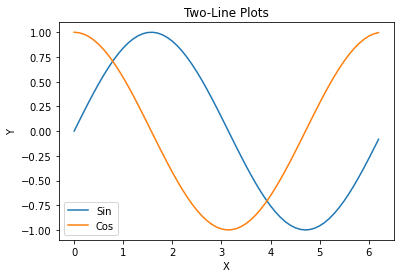

In [4]:
### Data Generation ###
x = np.arange(0, 2*pi, step = .1) # Generate x values
sin_wave = np.sin(x) # Y1 Values
cos_wave = np.cos(x) # Y2 Values

### Plotting ###
fig2, ax = plt.subplots()  # Activate/Create figure 2 and an explicit axis
ax.plot(x,sin_wave, label='Sin')  # Add sin wave, labeled "Sin"
ax.plot(x,cos_wave, label='Cos')  # Add cos wave, labeled "Cos"
ax.set_xlabel('X')  # Add a label to the x-axis
ax.set_ylabel('Y')  # Add a label to the y-axis
ax.legend() # Add a legend using the line labels
ax.set_title('Two-Line Plots');# Add a title to your figure

### Step 1: Initialize Figure

```python
fig2, ax = plt.subplots()  # Activate/Create figure 2 and an explicit axis
```

This figure initialization is effectively the same as Example 1. However, using `subplots` instead of `figure` allows us to explicitly initialize and axis for our figure. When creating a figure with a single axis, you do not need to pass in any arguments to `subplots`. More information on how to use `subplots` for more complex figures will be introduced in Example 4.

### Step 2: Plot your data

```python
ax.plot(x,sin_wave, label='Sin')  # Add sin wave, labeled "Sin"
ax.plot(x,cos_wave, label='Cos')  # Add cos wave, labeled "Cos"
```

We are now plotting two different line plots on the same figure and **on the same axis/subplot**. Like Example 1, we are implicitly using a single axis/subplot for both sets of data, allowing them to be plotted together. To help label each line, we add the `label` argument to our plotting function. We'll be using the `label` argument later on. Additionally, instead of calling `plt.plot`, we now use `ax.plot`, indicating that we wish to use the specified axis instead of a general active figure.

### Step 3: Add plot details

```python
ax.set_xlabel('X')  # Add a label to the x-axis
ax.set_ylabel('Y')  # Add a label to the y-axis
ax.legend() # Add a legend using the line labels
ax.set_title('Two-Line Plots');# Add a title to your figure
```

We use similar functions to Example 1 (with slight modification because we are working on an axis instead of a figure) to add additional labels and details to our plot.

---

## Example 3: Mixing Plot Types

Matplotlib comes with many different plot types. From scatter plots to line plots, from histograms to heat-maps, there is an extensive library of functions for various applications. Given compatible plot types (e.g., scatter and line plots), you can plot both on a single plot! This is perfect when exploring curve fitting, visualizing thresholds, and more. To see how this works, let's create a scatter plot and line plot on a single figure simultaneously.

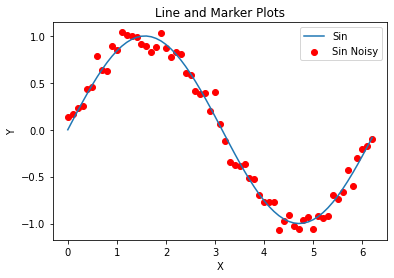

In [5]:
### Data ###

# We'll be resuing our sin and x data defined earlier in the notebook
# Create a sin curve with some gaussian noise
sin_noisy = np.sin(x) + np.random.normal(0,.1, x.shape) 

### Plotting ###
fig3, ax = plt.subplots()  # Activate/Create Figure "2"
ax.plot(x,sin_wave, label='Sin')  # Line Plot, same as Example 1 and 2
ax.scatter(x,sin_noisy, label='Sin Noisy', c='r')  # Scatter plot, with specified color
ax.set_xlabel('X')  # Add a label to the x-axis
ax.set_ylabel('Y')  # Add a label to the y-axis
ax.legend() # Add a legend using the line labels
ax.set_title('Line and Marker Plots');# Add a title to your figure

Most of the steps are the same, so let's look at the only difference from Step 2:

### Step 2: Plot your data

```python
ax.plot(x,sin_wave, label='Sin')  # Line Plot, same as Example 1 and 2
ax.scatter(x,sin_noisy, label='Sin Noisy', c='r')  # Scatter plot, with specified color
```

Now, we are plotting two different types of plots. `Matplotlib` will automatically use the same axis/subplot from the line plot for the scatter plot. Because we haven't specified any x- or y-axis limits, Matplotlib will also automatically rescale as needed, although this wasn't necessary in this example.

---

## Example 4: Multiple Subplots

In this last example, we'll now start exploring adding multiple plots to a single figure. For this example, we'll create a figure with four plots arranged in a 2x2 fashion.

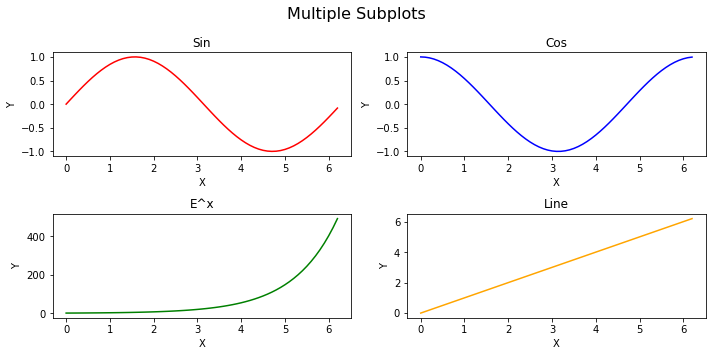

In [6]:
### Data ###

## We are using sin and cos from previous examples
exp_x = np.exp(x) # Generate exponential x
line_x = x


### Plotting ###

## Step 1
fig1, axes = plt.subplots(2,2,figsize=(10,5)) # 2x2 grid

## Step 2
axes[0,0].plot(x, sin_wave, c='r')
axes[0,1].plot(x, cos_wave, c='b')
axes[1,0].plot(x, exp_x, c='g')
axes[1,1].plot(x, line_x, c='orange')

## Step 3

### Titles
axes[0,0].set_title('Sin')
axes[0,1].set_title('Cos')
axes[1,0].set_title('E^x')
axes[1,1].set_title('Line')

### Add individual axis labels
for ax in axes.flat:
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    
### Add Figure Title
fig1.suptitle("Multiple Subplots", fontsize=16)

### Fix spacing
fig1.tight_layout()

## Step 4
plt.savefig("introduction-matplotlib-example4.png")

### Step 1: Initialize Figure

```python
fig1, axes = plt.subplots(2,2,figsize=(10,5)) # 2x2 grid
```

Like the last two examples, we are using `plt.subplot` to instantiate our figure and axis objects. To indicate the arrangement of your subplots in a figure, you pass in two additional integer arguments indicating the number of rows and columns in the figure. These dimensions define a grid with a subplot at each point. Accordingly, axes is now a list of lists (matrix) that matches the dimensions we indicated.

Additional cosmetic changes will be introduced in a later module, but one common thing you may want to do is change the figure size. To do so, you pass in the argument `figsize=(width, height)` into the `plt.subplots()` function.

### Step 2: Plot your data

```python
axes[0,0].plot(x, sin_wave, c='r')
axes[0,1].plot(x, cos_wave, c='b')
axes[1,0].plot(x, exp_x, c='g')
axes[1,1].plot(x, line_x, c='orange')
```

To add a graph to a specific axis/subplot, you index into `axes` like another Python (NumPy) matrix:

```python
axes[row_index, column_index]
```

Other than this small change, the remainder of this step remains the same as the previous examples.

### Step 3: Add plot details

```python
### Titles
axes[0,0].set_title('Sin')
axes[0,1].set_title('Cos')
axes[1,0].set_title('E^x')
axes[1,1].set_title('Line')

### Add individual axis labels
for ax in axes.flat:
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

### Add Figure Title
fig1.suptitle("Multiple Subplots", fontsize=16)
    
### Fix spacing
fig1.tight_layout()
```

To make changes to individual axis/subplots, we use the same indexing syntax as in Step 2 and the same functions as previous examples.

As shown in this example, it is possible to iterate through the list of axis (left to right, top to bottom) with a for-loop instead of explicitly indexing every time. However, you must "flatten" the axes matrix that you iterate over.

Figures with multiple subplots can quickly become messy. One way to adjust the spacing and other aspects is to use the `figure.tight_layout()` function.

### Step 4: Save your Figure

```python
plt.savefig("introduction-matplotlib-example4.png")
```

`plt.savefig(path-to-image)` is the syntax you use for saving a figure to your computer (such as generating an image for a presentation). 

## Closing

That's it for the basics of plotting in Python with `matplotlib`! There are many additional cosmetic changes we can make to the plots to improve their legibility, including sharing x- and y-axis labels, altering the grid representations, and much more (See [this Matplotlib documentation page](https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html) for a quick introduction). There are many more features in `matplotlib` for more complex graphing and figure customization. I hope this guide serves as a foundation for your Python plotting journey!